In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Дожди в Австралии

Датасет содежит информацию о 10 годах ежедневных наблюдений за погодой в разных уголках Австралии. Задача заключается в том, чтобы по сегодняшней погоде спрогнозировать будет ли идти дождь завтра. 
*RainTomorrow* - целевая переменная для прогнозирования. Она как раз и отображает - будет завтра дождь или нет (соответственно, значения "Да" или "Нет"). Отметим, что в этом столбце указано «Да», если в этот день выпало 1 мм осадков или более


## 1) Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/DimaSilenko/Machine-Learning/master/weatherAUS.csv"
data = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному дню) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data.shape

(145460, 23)

Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


А data_raw.tail() последние строки

In [5]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Мы видим, что столбцы (признаки) имеют имена:
- `Date`           - дата наблюдения
- `Location`       - местоположение метеостанции
- `MinTemp`        - минимальная температура
- `MaxTemp`        - максимальная температура
- `Rainfall`       - Осадки в день (в мм)
- `Evaporation`    - Испарение (мм) за 24 часа
- `Sunshine`       - Количество часов яркого солнечного света в день
- `WindGustDir`    - Направление сильнейшего порыва ветра за 24 часа 
- `WindGustSpeed`  - Скорость самого сильного порыва ветра (км/ч) за сутки
- `WindDir9am`     - Направление ветра в 9:00
- `WindDir3pm`     - Направление ветра в 15:00
- `WindSpeed9am`   - Средняя скорость ветра в 9:00
- `WindSpeed3pm`   - Средняя скорость ветра в 15:00
- `Humidity9am`    - Влажность (в %) в 9:00
- `Humidity3pm`    - Влажность (в %) в 15:00
- `Pressure9am`    - Атмосферное давление (гПа) в 9:00
- `Pressure3pm`    - Атмосферное давление (гПа) в 15:00
- `Cloud9am`       - Часть неба, закрытая облаками в 9:00 (0 - полностью ясное небо, 8 - полностью пасмурное)
- `Cloud3pm`       - Часть неба, закрытая облаками в 15:00 (0 - полностью ясное небо, 8 - полностью пасмурное)
- `Temp9am`        - Температура в 9:00
- `Temp3pm`        - Температура в 15:00
- `RainToday`      - Логическое значение (1, если количество осадков (мм) за 24 часа превышает 1 мм, иначе - 0)
- `RainTomorrow`   - Есть ли дождь на следующий день

Задача - спрогнозировать, будет ли завтра дождь

In [6]:
print(data.at[1, 'Location'])

Albury


## 2) Визуализируем данные и вычислим основные характеристики

Для начала, получим сводную информацию о признаках

In [7]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Построим диаграммы рассеивания для всех пар признаков (количественных)

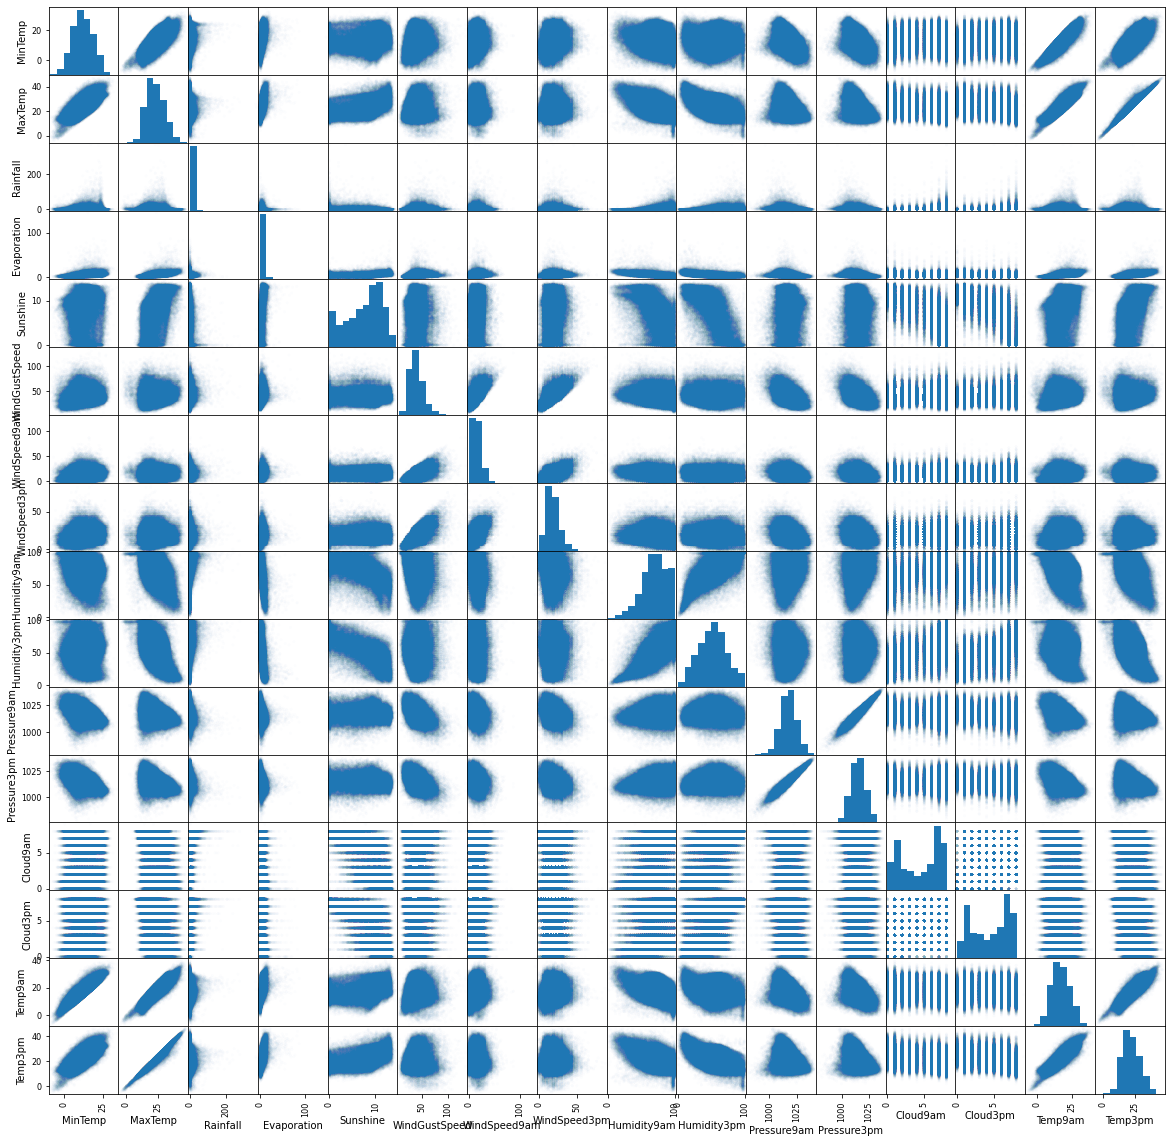

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

На диаграммах видно, что лучше всего коррелируют признаки из разряда: давление утром - давление днем или разного рода температуры. Но далее продемонстрируем это другим способом

Также для количественных признаков вычислим матрицу корреляции

In [9]:
corr_mat = data.corr()
corr_mat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

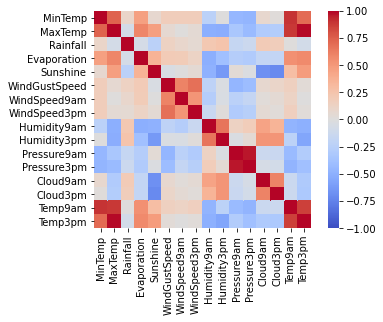

In [10]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Посмотрим, что с чем сильно коррелирует

In [11]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

MaxTemp        Temp3pm         0.984503
Pressure9am    Pressure3pm     0.961326
MinTemp        Temp9am         0.901821
MaxTemp        Temp9am         0.887210
Temp9am        Temp3pm         0.860591
MinTemp        MaxTemp         0.736555
               Temp3pm         0.708906
WindGustSpeed  WindSpeed3pm    0.686307
Humidity9am    Humidity3pm     0.666949
WindGustSpeed  WindSpeed9am    0.605303
Cloud9am       Cloud3pm        0.603564
MaxTemp        Evaporation     0.587932
Evaporation    Temp3pm         0.572893
               Temp9am         0.545115
Humidity3pm    Cloud3pm        0.523120
WindSpeed9am   WindSpeed3pm    0.519547
Humidity3pm    Cloud9am        0.517120
dtype: float64

Вполне ожидаемо, что температура днем коррелирует с температурой утром или с максимальной/минимальной за день; влажность с облачностью и тд

Далее из чистого любопытсва построим один график и исследуем данные для дальнейшей обработки

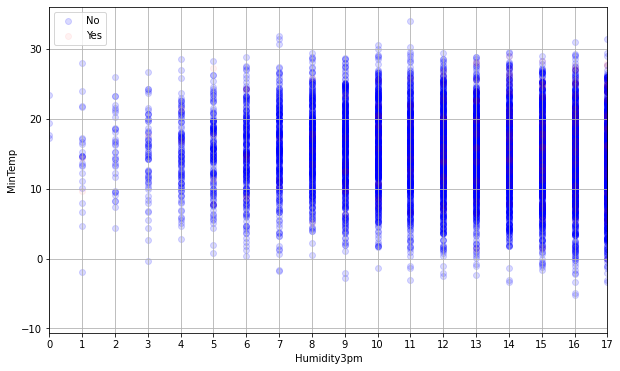

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['RainTomorrow'] == 'No']['Humidity3pm'],
            data[data['RainTomorrow'] == 'No']['MinTemp'],
            alpha = 0.15,
            label = 'No',
            color = 'b')

plt.scatter(data[data['RainTomorrow'] == 'Yes']['Humidity3pm'],
            data[data['RainTomorrow'] == 'Yes']['MinTemp'],
            alpha = 0.05,
            label = 'Yes',
            color = 'r')

plt.xlabel('Humidity3pm')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('MinTemp')
plt.legend()
plt.grid()

In [13]:
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2014-01-08,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [14]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2014-01-08,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [15]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

# Готовим данные

In [17]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [18]:
for c in categorical_columns:
    print(c, data[c].unique())

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['N

## 3) Обработаем пропуски

Для начала посмотрим сколько их вообще в каждом столбце

In [19]:
data.isna().sum()  

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Появляется вопрос, какую стратегию избрать? Пропуски в числовых признаках заполним медианами

In [20]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()  

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой

In [21]:
data['WindGustDir' ].fillna(data['WindGustDir' ].mode().iloc[0], inplace=True)
data['WindDir9am'  ].fillna(data['WindDir9am'  ].mode().iloc[0], inplace=True)
data['WindDir3pm'  ].fillna(data['WindDir3pm'  ].mode().iloc[0], inplace=True)
data['RainToday'   ].fillna(data['RainToday'   ].mode().iloc[0], inplace=True)
data['RainTomorrow'].fillna(data['RainTomorrow'].mode().iloc[0], inplace=True)
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Посмотрим теперь на матрицу корреляции

In [22]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [23]:
data_describe = data.describe(include = [object])
data.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460,145460
unique,3436,49,16,16,16,2,2
top,2014-01-08,Canberra,W,N,SE,No,No
freq,49,3436,20241,22324,15066,113580,113583


## 4) Обработаем категориальные признаки

Нужно что-то делать с категориальными признаками

In [24]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


С бинарными признаками разобраться не сложно

In [25]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count     145460
unique         2
top            0
freq      113580
Name: RainToday, dtype: int64

In [27]:
data.at[data['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
data.at[data['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data['RainTomorrow'].describe()

count     145460
unique         2
top            0
freq      113583
Name: RainTomorrow, dtype: int64

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Такую векторизацию осуществляет в pandas метод get_dummies:

In [28]:
data[nonbinary_columns]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,W,W,WNW
1,2008-12-02,Albury,WNW,NNW,WSW
2,2008-12-03,Albury,WSW,W,WSW
3,2008-12-04,Albury,NE,SE,E
4,2008-12-05,Albury,W,ENE,NW
...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE
145456,2017-06-22,Uluru,NNW,SE,N
145457,2017-06-23,Uluru,N,SE,WNW
145458,2017-06-24,Uluru,SE,SSE,N


In [29]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Date_2007-11-01', 'Date_2007-11-02', 'Date_2007-11-03',
       'Date_2007-11-04', 'Date_2007-11-05', 'Date_2007-11-06',
       'Date_2007-11-07', 'Date_2007-11-08', 'Date_2007-11-09',
       'Date_2007-11-10',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=3533)


In [30]:
len(data_nonbinary.columns)

3533

## 5) Проведем нормализацию количественных признаков

Метод ближайших соседей чувствителен к масштабированию данных (в отличи от, к примеру, дерева решений). В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [31]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [32]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05
mean,3.028272e-14,-8.231757e-14,-4.579385e-14,-1.071680e-12,-4.582884e-13,7.840727e-15,5.293677e-15,4.004012e-16,-7.636306e-15,7.976221e-15,1.741436e-11,-4.853791e-12,5.164207e-15,-9.779597e-14,2.623867e-14,-1.630031e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.250514e+00,-3.952391e+00,-2.750957e-01,-1.629467e+00,-2.897207e+00,-2.588398e+00,-1.583285e+00,-2.141834e+00,-3.654200e+00,-2.518320e+00,-5.520525e+00,-5.724812e+00,-2.042418e+00,-2.235611e+00,-3.750345e+00,-3.951287e+00
25%,-7.056564e-01,-7.358491e-01,-2.750957e-01,-3.711376e-01,7.618806e-02,-6.830452e-01,-7.933776e-01,-6.504466e-01,-6.311866e-01,-7.109155e-01,-6.160032e-01,-6.227669e-01,-7.274875e-01,-3.369680e-01,-7.267613e-01,-7.253195e-01
50%,-3.016967e-02,-8.689767e-02,-2.750957e-01,-1.194718e-01,1.487099e-01,-7.333237e-02,-1.163140e-01,3.788606e-02,5.827249e-02,2.181605e-02,-6.653450e-03,-7.520228e-03,1.491327e-01,1.376927e-01,-4.451661e-02,-8.304543e-02
75%,7.238621e-01,7.031302e-01,-2.035800e-01,6.361066e-03,2.574926e-01,4.601664e-01,5.607497e-01,6.114966e-01,7.477316e-01,6.568500e-01,6.175585e-01,6.227324e-01,5.874428e-01,6.123535e-01,6.997503e-01,6.614086e-01
max,3.410100e+00,3.510551e+00,4.394542e+01,4.398496e+01,2.360626e+00,7.243222e+00,1.308643e+01,7.838990e+00,1.649332e+00,2.366557e+00,3.471099e+00,3.653947e+00,1.902373e+00,2.036336e+00,3.599290e+00,3.653822e+00


## Соединяем все в одну таблицу

In [33]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(145460, 3551)


In [34]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,3.028272e-14,-8.231757e-14,-4.579385e-14,-1.071680e-12,-4.582884e-13,7.840727e-15,5.293677e-15,4.004012e-16,-7.636306e-15,7.976221e-15,...,0.054104,0.059192,0.068239,0.103575,0.064616,0.056070,0.064306,0.069504,0.061006,0.065434
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.226224,0.235984,0.252156,0.304709,0.245847,0.230058,0.245299,0.254310,0.239343,0.247291
min,-3.250514e+00,-3.952391e+00,-2.750957e-01,-1.629467e+00,-2.897207e+00,-2.588398e+00,-1.583285e+00,-2.141834e+00,-3.654200e+00,-2.518320e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.056564e-01,-7.358491e-01,-2.750957e-01,-3.711376e-01,7.618806e-02,-6.830452e-01,-7.933776e-01,-6.504466e-01,-6.311866e-01,-7.109155e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.016967e-02,-8.689767e-02,-2.750957e-01,-1.194718e-01,1.487099e-01,-7.333237e-02,-1.163140e-01,3.788606e-02,5.827249e-02,2.181605e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.238621e-01,7.031302e-01,-2.035800e-01,6.361066e-03,2.574926e-01,4.601664e-01,5.607497e-01,6.114966e-01,7.477316e-01,6.568500e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.410100e+00,3.510551e+00,4.394542e+01,4.398496e+01,2.360626e+00,7.243222e+00,1.308643e+01,7.838990e+00,1.649332e+00,2.366557e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6) Разобьем данные на обучающую и тестовую выборки

Для начала вынесем последний столбец из x в y, потому что его нам и нужно предсказывать

In [35]:
X = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

In [36]:
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=3550)

Можно конвертировать таблицы в массивы:

In [37]:
X = X.to_numpy()
y = np.array(y != 0, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print(X.shape)
print(y.shape)
N, d = X.shape

(145460, 3550)
(145460,)


In [39]:
type(X)

numpy.ndarray

In [40]:
type(y)

numpy.ndarray

Разобьем данные на обучающую и тестовую выборки в пропорции 70% - обучающая выборка, 30% - тестовая:

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

101822 43638


## 7) Метод k-ближайших соседей

Для начала запустим обучение

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Попробуем предсказать результат на данных X_test

In [84]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.15546083688528348

Другой способ добиться того же

In [82]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [83]:
err_test

0.15546083688528345

Также сгенерируем матрицу ошибок

In [86]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[32898  1089]
 [ 5695  3956]]


In [87]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

В данном методе можно использовать разное количество соседей. Попробуем найти лучший вариант

In [88]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.15130328502449564 25


Отлично, мы нашли, что 25 соседей подходит лучше всего. Остается вычислить ошибки на обучающей и тестовой выборках:

In [48]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14245447938559447 0.1521838764379669


В результате мы видим, что ошибка на обучающей выборке меньше, что и ожидалось увидеть, но при этом она присутствует, поскольку переобучение тоже плохо (это когда мы можем решать 100% задач на которых обучались, но вот все остальные решать не умеем)

## 8) Выводы
Итак, всю основную работу мы проделали, осталось сделать какие-нибудь выводы. Можно отметить, что хотя предсказывание погоды дело неблагодарное - природа всегда может выкинуть какой-нибудь финт ушами, предсказание действует весьма неплохо. Наша работа не совсем честная, поскольку по хорошему нужно было проводить всю предобработку данных только для обучающей выборки, а не для всего, как сделали мы, для наших целей этого вполне достаточно. К тому же при таком обьеме данных разница не велика. К слову о размере данных - это главный минус, который был замечен при работе с методом k-ближайщих соседей. При больших обьемах данных он работает чертовски медленно, особенно с ростом числа соседей. В остальном он показывает себя с лучшей стороны - достаточно прост в использовании и дает хороший результат. Также, из данных можно было спокойно убрать дату, поскольку она ничего не привносит, а лишь замедляет работу, но это лишь небольшая оптимизация. 
В целом же, данная работа помогла лучше разобраться со структорой данных, как их предобрабатывать и приводить в нужный вид, что делать со специфичными данными (нечисловыми и пропусками) и как исполльзовать алгоритмы машинного обучения, реализованные в scikit-learn, а также как получить результат и интерпретировать его

## 9) Запуск других классификаторов и сравнение результатов
### SVC - Машина опорных векторов

In [43]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [44]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.15655752195006972 0.1564691324075347


### Random Forest - Случайный лес

In [45]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.1467528301022045


### Extremely Randomized Trees

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.1512901599523351


### AdaBoost

In [47]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.14275893225432618 0.14950272698107153


## Выводы после использования других методов
Мы попробовали применить на своих данных несколько алгоритмов машинного обучения из библиотеки scikit-learn. KNN, SVC, RF, ExtrRF, AdaBoost показали разные результаты на тестовой выборке, обобщим их в одном месте:
<br>KNN      - 0.1521838764379669
<br>SVC      - 0.1564691324075347
<br>RF       - 0.1467528301022045
<br>ExtrRF   - 0.1512901599523351
<br>AdaBoost - 0.14950272698107153
<br>Можно отметить, что при использовании KNN, мы провели подбор наиболее оптимального числа соседей, а вот при использовании других методов аналогичных процедур не проводили, это связано с тем, что с нашим датасетом даже один запуск метода занимает много времени, а уж про подбор параметров и говорить нечего. Лучше всего себя показал - Случайный лес. В целом, к сделанным раннее выводам добавить больше нечего, так что перейдем к следующему пункту  

## 10) Борьба с несбалансированностью классов
В нашем случае распределение целевой переменной имеет следующий вид: 76% - нет; 22% - да. Это уже можно назвать несбелансированностью классов и с ней можно попробовть как-то бороться. Для этого мы будем использовать алгоритм SMOTE

In [48]:
print(data.shape)

(145460, 3551)


Посмотрим, какое количество наблюдений приходится на каждый из классов целевой переменной

In [49]:
data['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

Помимо этого, проверим распределение в обучающей и тестовой выборках

In [50]:
print("Number transactions X_train dataset: ", X_train.shape)

print("Number transactions y_train dataset: ", y_train.shape)

print("Number transactions X_test dataset: ", X_test.shape)

print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (101822, 3550)
Number transactions y_train dataset:  (101822,)
Number transactions X_test dataset:  (43638, 3550)
Number transactions y_test dataset:  (43638,)


Применим алгоритм SMOTE

In [58]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))

print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

  
# импорт модуля SMOTE из библиотеки imblearn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

  

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

  

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 22226
Before OverSampling, counts of label '0': 79596 



MemoryError: Unable to allocate 2.69 GiB for an array with shape (101822, 3550) and data type float64

К сожалению, данных у нас слишком много и эта операция не проходит по памяти, а даже если бы проходила, то скорее всего занимала бы слишком много времени. Но если бы все отработало бы, то мы увидели бы следующее: число "единичек" в обучающей выборке стало бы равным числу "нулей" (= 79596).<br>
Есть еще метод NEARMISS, который наоборот уменьшит число "ноликов" до числа "единичек", но он падает с той же проблемой с памятью, так что его не приводим за неимением смысла<br>
После этого мы могли бы снова запустить метод K-ближацших соседей, с числом этих самых соседей = 10 и посмотреть как изменится результат, но из-за вышеозвученной проблемы это так и останется просто куском кода. Чтож, мы хотя бы попробовали!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train_res, y_train_res)

In [ ]:
y_test_predict_res = knn.predict(X_test)
err_test_res  = np.mean(y_test  != y_test_predict_res)
err_test_res

## 11) Исключение коррелированных переменных

Ранее мы уже рассматривали что с чем сильно коррелирует, приведем еще раз самые сильно скореллированные значения:
<br>1) MaxTemp        Temp3pm         0.984503
<br>2) Pressure9am    Pressure3pm     0.961326
<br>3) MinTemp        Temp9am         0.901821
<br>4) MaxTemp        Temp9am         0.887210
<br>5) Temp9am        Temp3pm         0.860591
<br>Для примера, уберем MaxTemp, Pressure9am и MinTemp

In [47]:
X = data.drop(['RainTomorrow', 'MaxTemp', 'Pressure9am', 'MinTemp'], axis = 1)
y = data['RainTomorrow']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

In [48]:
feature_names

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=3547)

In [49]:
X = X.to_numpy()
y = np.array(y != 0, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
print(X.shape)
print(y.shape)
N, d = X.shape

(145460, 3547)
(145460,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

101822 43638


Теперь снова запустим метод k-ближайших соседей с 10 соседями и сравним результаты

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.15582748980246575

Построим матрицу ошибок

In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[32930  1057]
 [ 5743  3908]]


Мы видим, что результат явно есть, но, к сожалению, ошибка чуть-чуть увеличилась. Также заметно изменение в матрице ошибок, ложно-положительных результатов стало поменьше, но это не спасло общую картину. Переменные для удаления мы выбрали можно сказать случайно, этим можно обьяснить ухудшение результата. Здесь можно было бы исключить те переменные, что лучше корелируют с результатом или попробовать подобрать оптимальное число соседей, но это выходит за рамки нашей задачи. Полученный нами результат нам достаточен

## 12) Общие выводы


Итак мы провели сравнение разных классификаторов и даже смогли улучшить результат, полученный методом k-ближайших соседей. К тому же во всех методах есть возможность подбора наиболее оптимальных параметров работы, но этот момент был нами опущен, так как занимал бы слишком много времени (и без подбора запуск методов затянулся больше чем на сутки). Это вызвано большим количеством данных, что, в свою очередь, позволило нам добиться правильного предсказывания дождя с вероятностью ~ 85.5%, что является хорошим результатом для такой сложной и тяжело предсказуемой вещи как погода. А вот с борьбой с несбалансированностью и исключением коррелированных переменных вышло не очень удачно. Побороть несбалансированность не вышло из-за технических ограничений, данных все же слишком много, но в теории с методом все же мы познакомились и поняли, что должно было произойти. А вот исключение коррелированных переменных не дало преимущество при использовании метода k-ближайших соседей. Но и не беда, ведь основная суть была как раз в том, чтобы познакомиться с разными подходами и методами, что и было нами успешно проделано

# Домашняя работа № 6
## Полносвязная (неглубокая) нейронная сеть

Для начала, попробуем использовать один слой и попробуем подобрать наилучшее количество нейронов

In [47]:
from sklearn.neural_network import MLPClassifier
hidden_layer = np.arange(1, 25, 5)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

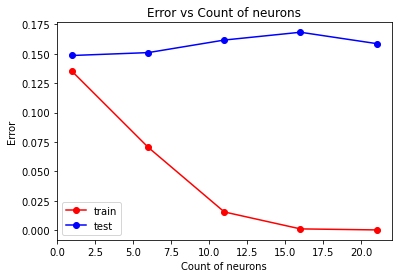

In [48]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs Count of neurons')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

In [49]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0003240949892950443 0.14854026307346807


In [50]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[1]


Отсюда мы видим, что оптимальное число нейронов - 1. Теперь добавим второй слой и проделаем все то же самое, но при этом, на втором слое будем работать с одним нейороном, а вот на первом подберем оптимальное количество. Можно заметить, что выборка числа нейронов у нас небольшая, это опять же связано с количеством данных, в противном случа подбор параметров займет вечность и мы скорее состаримся, чем дождемся вменяемого результата. А также из графика видно быстрое наступление "переобучения", ошибка на обучающей выборке стремится к нулю, а вот на тестовой наоборот увеличивается

In [51]:
hidden_layer = np.arange(1, 25, 5)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, 1), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

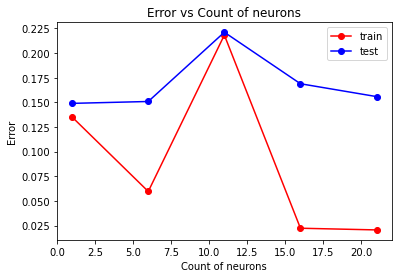

In [52]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs Count of neurons')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.020526015988686138 0.14897566341262203


In [54]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[1]


В результате, используя 1 нейронов на первом слое и 1 на втором, мы смогли получить ошибку на тестовой выборке = 0.14897566341262203, что является очень хороший результатом, но не дотягивает до Случайного леса, который все еще остается лучшим. Отметим также, что результаты могут быть иными, если производить перебор числа нейронов более тщательно, но имеем что имеем.

Используя полученные значения, попробуем подобрать оптимальное значение параметра alpha, так же небольшим перебором. Итак, используем два нейронных слоя, с 1 нейроном и на первом и на втором слое

In [60]:
from sklearn.metrics import accuracy_score
alpha_arr = np.arange(0.0001, 0.01, 0.001)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (14, 1), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=10000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

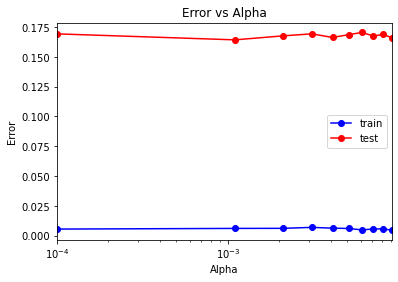

In [61]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

In [62]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.004714108935200644 0.1642834227049819


In [63]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.0011]


Получили, что оптимальное значение параметра alpha = 0.0011, а ошибка при этом - 0.1642834227049819. Вообще, выборка по параметру у нас была так себе, но причина этого повторяется из раза в раз. Можно было бы попробовать использовать это значение параметра и снова найти оптимальное число нейронов на слоях, но это займет еще больше времени, поэтому ограничимся тем, что имеем.<br>
Осталось сделать вывод: полносвязная нейронная сеть показала себя весьма хорошо, она способна выдать результат близкий к Случайному лесу. При более качественном подборе количества нейроном и параметра альфа, возможно, удастся добиться результата еще лучше, но быстрое наступление переобучения наталкивает на мысль, что стоит не увеличивать количество нейронов, а подбирать более плотную сетку для исследования. Однако, наша основная цель - познакомиться с методами и изучить принцип их работы была нами успешно достигнута